### check images to combine

In [2]:
import os
import numpy as np
# from util import util
import cv2
import json
from matplotlib import pyplot as plt
%matplotlib inline
import pickle

# change this path to your own path
person_left = './eval_logs/renders_newwh_1/'
person_right = './eval_logs/renders_new_0/'
depth_path = './new_jeans_train/test/camera_params/'

In [3]:
img1_list = sorted(os.listdir(person_left))
img2_list = sorted(os.listdir(person_right))
img1_list[272]

'00282.png'

4.029337 4.0014553


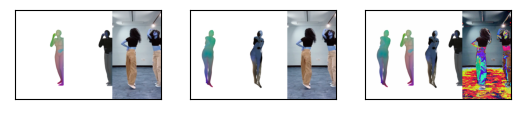

In [5]:
i=272
image_0 = cv2.imread(person_left + str(img1_list[i]))
image_1 = cv2.imread(person_right + str(img2_list[i]))

plt.subplot(131)
plt.imshow(image_0)
plt.gca().axes.xaxis.set_visible(False) #x축만 없애기
plt.gca().axes.yaxis.set_visible(False) #y축만 없애기
# plt.axis('off') 
plt.subplot(132)
plt.imshow(image_1)
plt.gca().axes.xaxis.set_visible(False) #x축만 없애기
plt.gca().axes.yaxis.set_visible(False) #y축만 없애기
# plt.axis('off') 
plt.subplot(133)
plt.imshow(image_0+image_1) 
plt.gca().axes.xaxis.set_visible(False) #x축만 없애기
plt.gca().axes.yaxis.set_visible(False) #y축만 없애기

with open(depth_path + str(img2_list[i].split('.')[0]) + '/000.pkl',"rb") as fr:
    data1 = pickle.load(fr)
with open(depth_path + str(img2_list[i].split('.')[0]) + '/001.pkl',"rb") as fr:
    data2 = pickle.load(fr)
depth1 = data1['camera_transl'][2]
depth2 = data2['camera_transl'][2]
print(depth1, depth2)




### image combine

In [6]:
import os
import numpy as np
# from util import util
import cv2
import json
from matplotlib import pyplot as plt
%matplotlib inline
import pickle



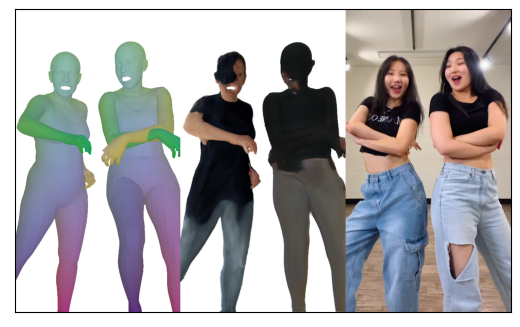

In [25]:

for i in range(len(img1_list)):
    image_0 = cv2.imread(person_left + str(img1_list[i]))
    image_1 = cv2.imread(person_right + str(img2_list[i]))
    with open(depth_path + str(img2_list[i].split('.')[0]) + '/000.pkl',"rb") as fr:
        data1 = pickle.load(fr)
    with open(depth_path + str(img2_list[i].split('.')[0]) + '/001.pkl',"rb") as fr:
        data2 = pickle.load(fr)
    depth1 = data1['camera_transl'][2]
    depth2 = data2['camera_transl'][2]

    image_0 = image_0 - 255
    image_1 = image_1 - 255

    if depth1 < depth2:
        imgB = image_1.copy() # Back
        imgF = image_0.copy() # Front
    else:
        imgB = image_0.copy()
        imgF = image_1.copy()

    img_F_shape = imgF.shape
    roi = imgB[0:img_F_shape[0],0:img_F_shape[1]]
    imgFgray = cv2.cvtColor(imgF,cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(imgFgray, 1, 255, cv2.THRESH_BINARY)
    mask_inv = cv2.bitwise_not(mask)
    # Now black-out the area of overlap region in ROI
    img_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
    # Take only region of overlap
    img_fg = cv2.bitwise_and(imgF,imgF,mask = mask)
    # Put overlap region in ROI and modify the main image
    dst = cv2.add(img_bg,img_fg)+255
    # img1[0:img_2_shape[0], 0:img_2_shape[1]] = dst
    cv2.imwrite('./eval_logs/combine/'+str(img1_list[i]), dst)
    dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst)
plt.gca().axes.xaxis.set_visible(False) #x축만 없애기
plt.gca().axes.yaxis.set_visible(False) #y축만 없애기

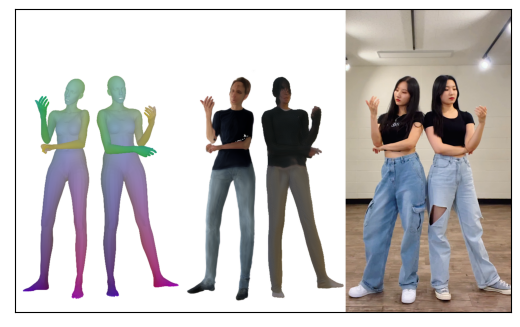

In [22]:
i = 13  
image_0 = cv2.imread(person_left + str(img1_list[i]))
image_1 = cv2.imread(person_right + str(img2_list[i]))
with open(depth_path + str(img2_list[i].split('.')[0]) + '/000.pkl',"rb") as fr:
    data1 = pickle.load(fr)
with open(depth_path + str(img2_list[i].split('.')[0]) + '/001.pkl',"rb") as fr:
    data2 = pickle.load(fr)
depth1 = data1['camera_transl'][2]
depth2 = data2['camera_transl'][2]

image_0 = image_0 - 255
image_1 = image_1 - 255

if depth1 < depth2:
    imgB = image_1.copy() # Back
    imgF = image_0.copy() # Front
else:
    imgB = image_0.copy()
    imgF = image_1.copy()

img_F_shape = imgF.shape
roi = imgB[0:img_F_shape[0],0:img_F_shape[1]]
imgFgray = cv2.cvtColor(imgF,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(imgFgray, 1, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
# Now black-out the area of overlap region in ROI
img_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of overlap
img_fg = cv2.bitwise_and(imgF,imgF,mask = mask)
# Put overlap region in ROI and modify the main image
dst = cv2.add(img_bg,img_fg)+255
# img1[0:img_2_shape[0], 0:img_2_shape[1]] = dst
cv2.imwrite('./eval_logs/combine/'+str(img1_list[i]), dst)
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(dst)
plt.gca().axes.xaxis.set_visible(False) #x축만 없애기
plt.gca().axes.yaxis.set_visible(False) #y축만 없애

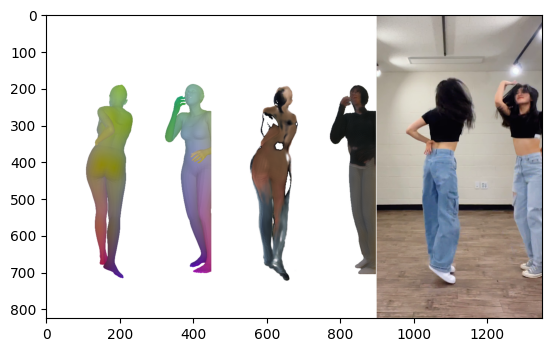

In [9]:
plt.imshow(dst)

In [4]:
import cv2
import os

image_folder = '/home/cvmlserver/Seohyeon/smplpix/eval_logs/combine/'
video_name = 'video.mp4'
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
images = [img for img in sorted(os.listdir(image_folder)) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape
video = cv2.VideoWriter(video_name, fourcc, 25.0, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))
    
cv2.destroyAllWindows()
video.release()

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
